# Python 🐍 Basistechnieken in de Natuurkunde

### Dmitry Kouznetsov, imec/KULeuven
<br>
<div >
    <img style="display: block; margin-left: auto; margin-right: auto; width: 70%;" src="https://files.realpython.com/media/Introduction-to-Jupyter-Notebooks_Watermarked.16bb2cf21ca5.jpg">
</div>

# Wat gaan we doen vandaag?

De opdrachten (🎉) in deze notebook zijn enkel bedoeld om bepaalde concepten te oefenen en moet je niet afgeven. Enkel de taak die in het tweede deel van de sessie wordt uitgelegd staat op punten.

1. **Python**

    a. Starterkit voor Pythonistas
    
    b. Mindset bij het programmeren
    
    c. Plotten voor dummies
    
    
2. **Fitten met LS-methode**

    a. Theorie
    
    b. Voorbeeld
    
    c. Taak

# Starterkit voor Pythonistas

### Functies?

In [1]:
# λ-calculus (https://nl.wikipedia.org/wiki/Lambdacalculus)
add_lambda = lambda a, b: a + b

# Standaard functies
def add_standaard(a, b):
    return a + b

# Object-gericht (gewoonlijk met camel-case benoemd, zie: https://en.wikipedia.org/wiki/Camel_case)
class Add:
    def __init__(self, a):
        self.a = a
    
    def __call__(self, b):
        return self.a + b
    
a, b = 2, 3
if add_lambda(a, b) == add_standaard(a, b) == Add(a)(b):
    print("De verschillende functies zijn equivalent!")

De verschillende functies zijn equivalent!


# Starterkit voor Pythonistas

### Pep8?

* Stijlgids voor python.
* Guido van Rossum: **"Code wordt vaker gelezen dan geschreven"**

In [2]:
# NIET GOED
def f  (   x,y ) :
    return      +-+42-x -y**3

# GOED
def g(x, y):
    return -42 - x - y**3

# Nakijken of functies hetzelfde berekenen
parameters = [41, 2]
"Ja! 😎" if f(*parameters) == g(*parameters) else "Nee"

'Ja! 😎'

# Mindset bij het programmeren: waarom computers?
<br>
<div class="parent" style="display: flex;">  
  <div class="left" style="flex: 50%;">
    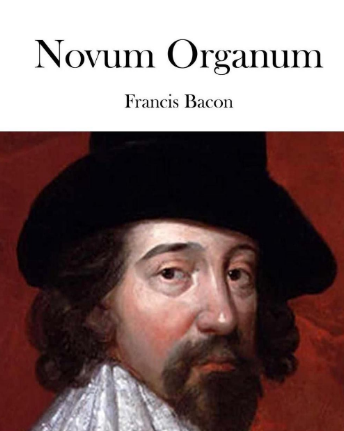
  </div>
  <div class="right" style="flex: 50%;">
      <ul>
          <li>Novum Organum (1620) - <a href="https://www.gutenberg.org/files/45988/45988-h/45988-h.htm">https://www.gutenberg.org/files/45988/45988-h/45988-h.htm</a></li>
          <li>Debuggen van mensen</li>
          <li>1970- : Wetenschappers + Computers = 💕</li>
      </ul>
  </div>
</div>

# Waarom Python?


* Populaire taal voor algemeen gebruik met **dynamisch typesysteem**
* Traag voor zware berekeningen, maar kan 'number-crunchen' in **modules gelinkt met code geschreven in C** (zoals numpy), of andere talen: C++, Rust, etc.
* **Numpy** module laat toe om **gevectoriseerde berekeningen** *makkelijk* uit te voeren

Meer info: https://scipy-lectures.org/intro/intro.html#why-python

# Waarom Numpy?

Voorbeeld:
$$f(x) = \sin^2(x) + 2$$

In [3]:
import numpy as np
import math

In [4]:
print("Standaard `math` module:")
%timeit [math.sin(x)**2 + 2 for x in range(10_000)]

print("\nMet `numpy` module:")
%timeit x = np.arange(0, 1, 10_000) ; np.sin(x)**2 + 2

print("\nWaw!")

Standaard `math` module:
3.1 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Met `numpy` module:
3.23 µs ± 134 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Waw!


# Slicing in Numpy

<br>
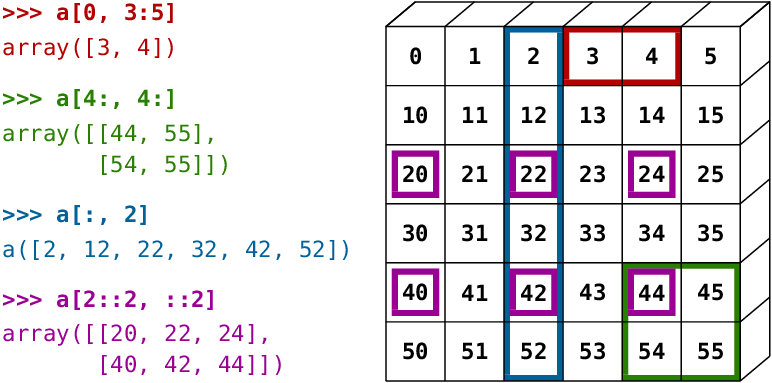

# Mindset bij het programmeren: structuur

<br>
<div style="text-align: center">
    <span style="border: 1px solid black; padding: 6pt;">
        Om het process te verduidelijken, voeg een niveau van abstractie toe.
    </span>
    <br>
    <span style="text-align:center; font-size: 18pt">⥮</span>
    <br>
    <span style="border: 1px solid black; padding: 6pt;">
        Voor snelheid bij het uitvoeren, verwijder een niveau van abstractie.
    </span>
</div>
<br>

Wat moet je kiezen?

# Kies abstractie over snelheid

* Beter algoritme $\rightarrow$ 4x sneller
* Keuze programmeertaal $\rightarrow$ 6x sneller
* Paar jaar wachten op betere hardware $\rightarrow$ 100x sneller

# Voorbeeld: Waterstofspectrum

*Het waterstofspectrum is de verzameling van golflengten $\lambda$ (kleuren) van licht dat een waterstofatoom kan uitzenden.*

De energieverschillen tussen de niveaus in het Bohrmodel worden gegeven door de Rydbergformule <br>[Bohr, N: *Rydberg's discovery of the spectral laws* North-Holland Publ., Amsterdam, 1985]

$$\frac{1}{\lambda} = R \left( \frac{1}{n_1^2} - \frac{1}{n_2^2}\right)$$

met $n_1$ het beginenergieniveau, $n_2$ het uiteindelijke energieniveau en $R$ de Rydbergconstante.

# Hoe het NIET moet

In [5]:
R = 1.097e-2
for m in range(1,4):
    print("m =",m)
    for n in range(m+1,m+6):
        invlambda = R*(1/m**2-1/n**2)
        print("  ",1/invlambda,"nm")

m = 1
   121.5436037678517 nm
   102.55241567912488 nm
   97.23488301428137 nm
   94.95594044363415 nm
   93.76220862091418 nm
m = 2
   656.3354603463993 nm
   486.1744150714068 nm
   434.084299170899 nm
   410.2096627164995 nm
   397.04243897498225 nm
m = 3
   1875.2441724182836 nm
   1281.9051959890612 nm
   1093.8924339106654 nm
   1005.013673655424 nm
   954.6697605038536 nm


# Vertaal de operaties die je doet in alleenstaande functies!

In [6]:
Rydberg = 1.097e-2

def line_series(n1, lines):
    """Reeks van spectraallijnen berekend met de Rydbergformule (in nm)
    
    Merk op: deze functie kun je nu apart runnen! Je zit niet meer vast in geneste for-loops.

    Argumenten:
        n1: Principal quantum number van het laagste energieniveau
        lines: Aantal lijnen te berekenen voor de reeks
    """
    return [1 / (Rydberg * (1/n1**2 - 1/n2**2)) \
            for n2 in range(n1 + 1, n1 + lines + 1)]

def hydrogen_spectrum(levels, lines):
    """Berekening van het waterstofspectrum
    
    Argumenten:
        levels: Aantal energie niveaus waarvoor de spectraallijnen worden berekend
        lines: Aantal lijnen te berekenen voor elke reeks
    """
    return {n1: line_series(n1, lines) \
            for n1 in range(1, levels + 1)}


hydrogen_spectrum(levels=3, lines=5)

{1: [121.5436037678517,
  102.55241567912488,
  97.23488301428137,
  94.95594044363415,
  93.76220862091418],
 2: [656.3354603463993,
  486.1744150714068,
  434.084299170899,
  410.2096627164995,
  397.04243897498225],
 3: [1875.2441724182836,
  1281.9051959890612,
  1093.8924339106654,
  1005.013673655424,
  954.6697605038536]}

In [7]:
def pretty_print(spectrum: dict):
    """Mooie weergaven van de berekende resultaten

    Args:
        spectrum: Berekende spectrum als `dict` datastructuur
    """
    for level, series in spectrum.items():
        print("n1 =", level)
        
        # Hier is het okay om geneste lussen te gebruiken omdat deze print functie niet essentieel is
        for line in series:
            print(f"    {line:.2f} nm")
            
pretty_print(hydrogen_spectrum(3, 5))

n1 = 1
    121.54 nm
    102.55 nm
    97.23 nm
    94.96 nm
    93.76 nm
n1 = 2
    656.34 nm
    486.17 nm
    434.08 nm
    410.21 nm
    397.04 nm
n1 = 3
    1875.24 nm
    1281.91 nm
    1093.89 nm
    1005.01 nm
    954.67 nm


# Tijd voor een opdracht! 🎉

Kijk na hoe je kan `slicen` in numpy. Probeer de volgende outputs te krijgen:

<br>
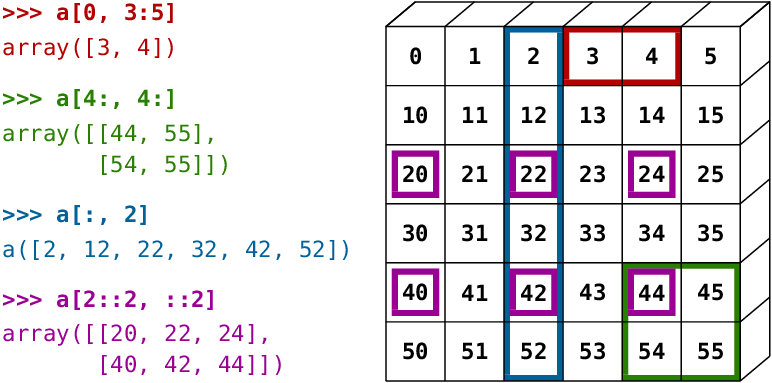

In [8]:
a=[]
k=0
for i in range(6):
    a.append([])
    for j in range(6):
        a[i].append(k)
        k+=1
    k+=4
a=np.array(a)
print(a)

display(a[0,3:5])
display(a[4:,4:])
display(a[:, 2])
display(a[2::2,::2])


[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


array([3, 4])

array([[44, 45],
       [54, 55]])

array([ 2, 12, 22, 32, 42, 52])

array([[20, 22, 24],
       [40, 42, 44]])

# Plotten voor dummies
<br>
<div >
    <img style="display: block; margin-left: auto; margin-right: auto; width: 70%;" src="https://files.realpython.com/media/Python_Plotting_With_Matplotlib_Watermark.610acdacc476.jpg">
</div>

# Plotten voor dummies: eenvoudige plot

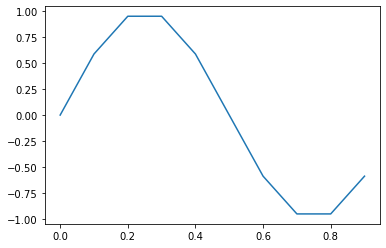

In [9]:
import matplotlib.pyplot as plt

pi = np.pi

t = np.arange(start=0.0, stop=1, step=0.1)

plt.plot(t, np.sin(2 * pi * t))

plt.show()

# Opmaak in orde brengen

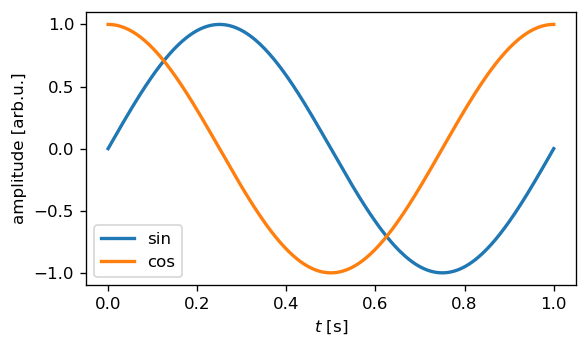

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))
t = np.linspace(start=0.0, stop=1.0, num=300)

ax.plot(t, np.sin(2 * np.pi * t), label='sin', linewidth=2)
ax.plot(t, np.cos(2 * np.pi * t), label='cos', linewidth=2)

ax.set_ylabel("amplitude [arb.u.]")
ax.set_xlabel("$t$ [s]")  # Je kunt LaTeX gebruiken om assen te benoemen!
ax.legend()

# Wat matplotlib magie...
plt.tight_layout()

# Opslaan?
# fig.savefig('sinusoïde.png')
plt.show()

# Voorbeeld: Laden van een condensator via een weerstand

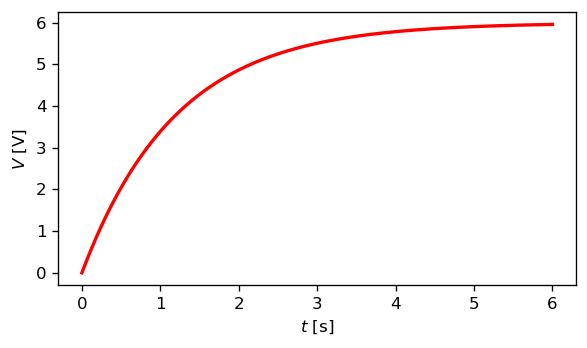

In [11]:
# Type-hinting is niet verplicht! Lees meer op: https://realpython.com/lessons/playing-python-types/
def opladen(t: np.array, Vb: float, tau: float) -> np.array:
    """Spanningsverloop over de condensator in functie van de tijd
    
    Args:
        t: tijdsverloop
        Vb: bronspanning
        tau: tijdsconstante
    """
    return Vb * (1 - np.exp(-t / tau))

def plot(ax, t, V):
    """Plotten van spanningsverloop"""
    ax.plot(t, V, color = 'r', linewidth=2)
    ax.set_ylabel("$V$ [V]")
    ax.set_xlabel("$t$ [s]")
    
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))
t = np.linspace(start=0.0, stop=6.0, num=300)
plot(ax, t, opladen(t, Vb=6.0, tau=1.2))
plt.tight_layout() ; plt.show()

# Voorbeeld: analyse van een tweedegraadsvergelijking

In [12]:
from scipy.optimize import minimize, fsolve

def quadratic(x, a, b, c):
    """Tweedegraadsvergelijking van de vorm ax^2 + bx + c"""
    return a * x**2 + b * x + c

# je kunt zelf makkelijk nagaan dat het minimum x = 1/6 is
mini = minimize(lambda x: quadratic(x, a=3, b=-1, c=-5), 0)

# Wat zijn de nulpunten?
nulpunten = fsolve(lambda x: quadratic(x, a=3, b=-1, c=-5), [-10, 10])
print("Minimum: ", mini["x"])
print("Nulpunten: ", nulpunten)

Minimum:  [0.16666666]
Nulpunten:  [-1.13504161  1.46837495]


# Tijd voor een opdracht! 🎉

Plot hieronder de analyse van de tweedegraadsvergelijking, d.w.z. een figuur met een grafische voorstelling van alle berekende elementen.

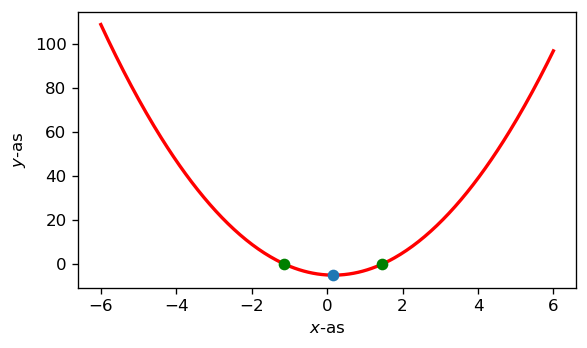

In [13]:
def plot(ax, x, y):
    """PLOT VAN DE GRAFIEK"""
    ax.plot(x, y, color = 'r', linewidth=2)
    ax.set_ylabel("$y$-as")
    ax.set_xlabel("$x$-as")
    
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))
x = np.linspace(start=-6.0, stop=6.0, num=300)
plot(ax, x, quadratic(x, a=3, b=-1, c=-5))
ax.plot(mini["x"],quadratic(mini["x"],a=3,b=-1,c=-5),"o")#Check ook zeker nog eens de scatterfunctie
ax.plot(nulpunten[0],0,"og")
ax.plot(nulpunten[1],0,"og")
plt.tight_layout() ; plt.show()

#Hier moet dus zeker noge een legende enzo bij zodat alles duidelijk is.

# Tijd voor een opdracht! 🎉

- Maak een plot van $f(\theta) = \tan^{-1}\left[ \tan \left(\theta \right)\right]$. Gebruikt $\theta$  van $-\pi$ tot $\pi$. De meest eenvoudige boogtangens functie die numpy kent, is `arctan`. Klopt het resultaat met de verwachting?
- Zoek nu op hoe je de `arctan2` functie (de vier-kwadrant-inverse-tangens) kunt gebruiken.

Zorg uiteindelijk voor een plot van $f(\theta)$ met de verschillende boogtangensfuncties op dezelfde figuur. Verzorg de opmaak!

*spoiler alert: bij een volgend practicum kunnen deze boogtangensfuncties van pas komen...*

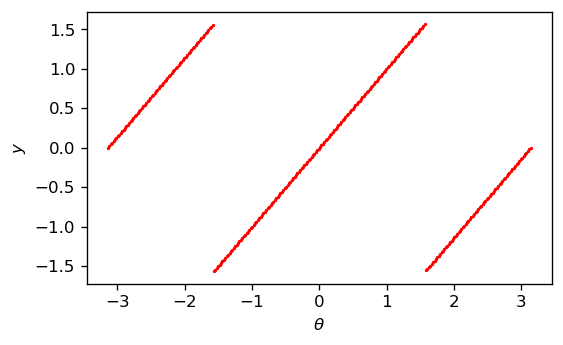

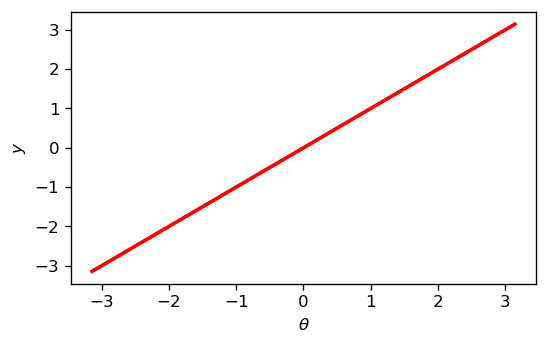

In [14]:
def plot(ax, theta, y):
    """Plotten van spanningsverloop"""
    ax.plot(theta, y, "o", ms=1, color = 'r')
    ax.set_ylabel("$y$")
    ax.set_xlabel(r"$\theta$")
    
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))
theta = np.linspace(start=-np.pi, stop=np.pi, num=300)
plot(ax, theta, np.arctan(np.tan(theta)))
plt.show()

def plot(bx, theta, y):
    """Plotten van spanningsverloop"""
    bx.plot(theta, y, color = 'r', linewidth=2)
    bx.set_ylabel("$y$")
    bx.set_xlabel(r"$\theta$")
    
fig, bx = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))
theta = np.linspace(start=-np.pi, stop=np.pi, num=600)
plot(bx, theta, np.arctan2(np.sin(theta),np.cos(theta)))
plot(bx, theta, np.arctan2(np.sin(theta),np.cos(theta)))
plt.show()

# Voorbereiding op huiswerk - fitalgoritme

We gaan gebruik maken van data, die voortgekomen is uit het practicum 'Netwerken en de wetten van Kirchhoff', namelijk de gemeten gesloten klemspanning $V_K$ [V] bij een stroom $I$ [mA], over een bron $V_1$ met open klemspanning $V_0$. In het practicum hebben we de interne weerstand $R_i$ [$\Omega$] van de bron bepaald als:

$$R_i = \frac{V_o - V_k}{I}. $$

Als voorbeeld gaan we dit nu doen d.m.v. een lineaire fit  door $V_k(I)$ ('load curve of a battery'):

$$V_k = -R_i \cdot I + V_o. $$

Eerst en vooral kijken we eerst naar hoe de data eruitziet:

In [15]:
# De data is in csv formaat gegeven. De extensie `.dat` kun je ook openen met je favoriete text editor.
# Opmerking 1: numpy ziet lijnen met een `#` symbool als comments en zal deze overslaan! (handig)
# Opmerking 2: numpy leest de data in als een **row-first** 2d matrix -> transponeren om column-first te lezen (.T)
data = np.loadtxt("kirchhoff_demo.dat", delimiter=",").T

# Maak gebruik van de header beschrijving in `kirchhoff_demo.dat` om te weten wat elke kolom voorstelt
I, dI = data[0], data[1]
V, dV = data[2], data[3]
print(I,dI,V,dV)

[0.00413 0.00421 0.00665 0.00974 0.01284 0.01404 0.0186 ] [5.0e-05 5.0e-05 8.0e-05 1.1e-04 1.4e-04 1.5e-04 2.0e-04] [11.06 11.09 10.94 10.85 10.64 10.6  10.31] [0.05 0.05 0.08 0.11 0.14 0.15 0.2 ]


In [16]:
def model(x, a, b):
    """Lineair model"""
    return a * x + b

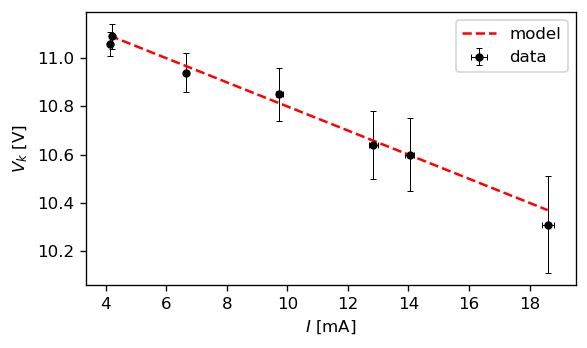

In [17]:
_, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(5, 3))

# We genereren een linspace om het model te plotten
x = np.linspace(np.min(I*1e3), np.max(I*1e3), 100)

# We schalen ook de stroom voor een beter leesbare x-as
ax.errorbar(I*1e3, V, xerr=dI*1e3, yerr=dV, label="data",

        # De errorbars wat mooier maken :)
        marker="o", markersize=4, fmt=" ", color="black", ecolor="black", capsize=2, capthick=0.6, linewidth=0.6)

ax.plot(x, model(x, -0.05, 11.3), 'r--', label="model")

ax.set_ylabel("$V_{k}$ [V]")
ax.set_xlabel("$I$ [mA]")
ax.legend()
    
plt.tight_layout() ; plt.show()

Voor interactiviteit kun je bijvoorbeeld de `holoviews` library gebruiken. (installer met `pip install holoviews`) Let op als je jupyter LAB gebruikt! Je moet dan extra componenten activeren via de terminal/command prompt:
    
    jupyter labextension install @pyviz/jupyterlab_pyviz

# Tijd voor een opdracht! 🎉 - fitalgoritme

Bewijs nu je fit goed is aan de hand van de theorie. We kijken hiervoor naar de maximum likelihood. *We overlopen klassikaal de theorie.*

Voor het fitten van het model aan de data stellen we de nulhypothese $H_0$ op: de teststatistiek voldoet aan de $\chi^2_\nu$ distributie met $\nu=N-p$ aantal vrijheidsgraden ($N$ is het aantal datapunten en $p$ het aantal parameters). Je kiest een significantieniveau $\alpha=1\%$ of $5\%$ typisch. Vervolgens vergelijk je de teststatistiek met de kritische waarde van de $\chi^2_\nu$-distributie en het geselecteerde betrouwbaarheidsniveau (meestal eenzijdig rechts).

De uiteindelijke 'goodness-of-fit' evaluatie gebeurt aan de hand van 2 waarden:

1. p-waarde $P(\chi^2_\nu > \chi^2(\theta))$ (kun je berekenen met `chi2.sf(x, df=nu)` of `1-chi2.cdf(x, df=nu)`)
    - $>\alpha\Rightarrow$ $H_0$ niet verwerpen
    - $<\alpha\Rightarrow$ $H_0$ verwerpen op significantieniveau $\alpha$
2. de gereduceerde $\chi^2_{red}$-waarde, $\chi^2_{red}=\frac{\chi^2}{N-p}$ (Vraag je ook af: wat betekent het als $\chi^2_{red} < 1$, $\chi^2_{red} > 1$ en $\chi^2_{red} \approx 1$?)

In [21]:
from scipy.stats import chi2
chi2.ppf(0.68, df=2)

def LS_calc(x):
    a,b = x
    LS=0
    for i in range(len(I)):
        LS+=(V[i]-a*I[i]-b)**2/(dV[i]**2/12)
    print(LS)
    return LS

mini = minimize(LS_calc,(-0.05,11))
print(mini)

391.84952307000503
391.849523333208
391.8495283702723
14197.594752993171
14197.594750757456
14197.594339919318
389.56614858353805
389.56614881501497
389.5661485720435
384.9676207273636
384.9676209574466
384.96762071592167
366.85117176195706
366.85117198646617
366.8511717507254
298.8279752490792
298.82797545129097
298.827975238689
144.26493175167036
144.26493189049512
144.26493174453722
6.469075818829635
6.469075818829027
6.469075818829678
6.469075816250005
6.469075816250004
6.4690758162500055
      fun: 6.469075816250005
 hess_inv: array([[ 3.17326646e+00, -1.89519198e-02],
       [-1.89519198e-02,  1.49127253e-04]])
      jac: array([-5.96046448e-08,  5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([-49.35926875,  11.28170972])


<br>
<div >
    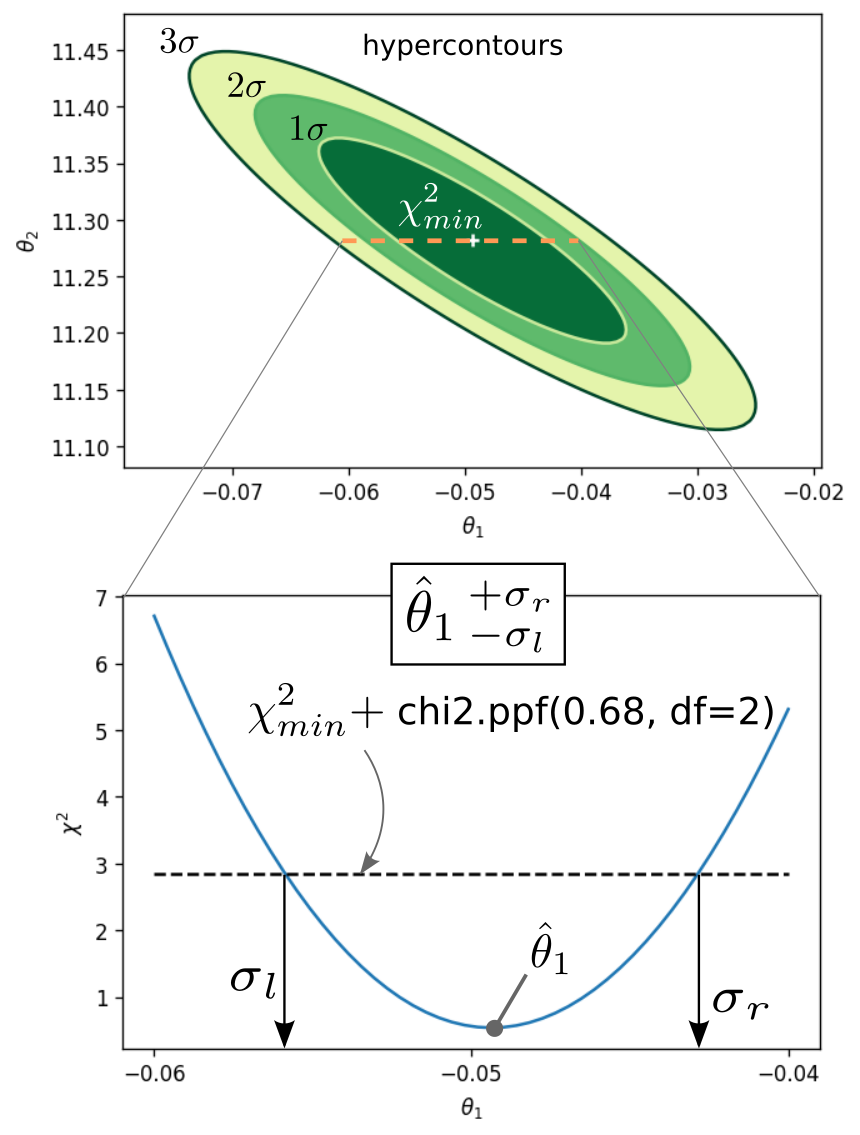
</div>

In [19]:
from scipy.stats import chi2

def chi_2(N,p,x):
    v=N-p
    return  chi.cdf(x,df=v)

def uncertainty_interval(N,p,alpha):
    L = chi(N,p,alpha/2)
    R = chi(N,p,(1-alpha)/2)
    print("[",L,",",R,"]")
uncertainty_interval(4,2,0.05)

NameError: name 'chi' is not defined

Laatste tip: voor inspiratie kan je kijken naar de documentatie van `emcee`: https://emcee.readthedocs.io/en/stable/tutorials/line/

Daar wordt de MCMC methode besproken in plaats van de LS methode, maar het gebruik van scipy modules wordt daar wel goed uitgelegd.